In [1]:
%matplotlib notebook

import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix, roc_curve, auc


import pandas as pd

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./Data/encoded_data_5%.csv') # nrows = [0, 10000000]

In [3]:
del data['Unnamed: 0'] #this is a problem with the index that came duplicated

In [4]:
features = list(data.columns)
features.remove('no_show') #this removes the output (no show) from the training variables
Y = data['no_show']
X = data[features]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)


In [8]:
y_train = keras.utils.np_utils.to_categorical(y_train.astype(int))
y_test = keras.utils.np_utils.to_categorical(y_test.astype(int))

In [9]:
m = Sequential()
m.add(Dense(60,  activation='relu', input_shape=(87,)))
m.add(Dense(30,  activation='relu'))
m.add(Dense(20,  activation='relu'))
m.add(Dense(5,  activation='relu'))
m.add(Dense(2,  activation='sigmoid'))
m.compile(loss='binary_crossentropy', optimizer = Adam(), metrics=['accuracy'])

history = m.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 129232 samples, validate on 32309 samples
Epoch 1/5
129232/129232 [==============================] - 12s 93us/step - loss: 0.2429 - acc: 0.9290 - val_loss: 0.2369 - val_acc: 0.9290
Epoch 2/5
129232/129232 [==============================] - 11s 86us/step - loss: 0.2347 - acc: 0.9294 - val_loss: 0.2445 - val_acc: 0.9291
Epoch 3/5
129232/129232 [==============================] - 11s 86us/step - loss: 0.2338 - acc: 0.9294 - val_loss: 0.2390 - val_acc: 0.9291
Epoch 4/5
129232/129232 [==============================] - 11s 86us/step - loss: 0.2329 - acc: 0.9294 - val_loss: 0.2339 - val_acc: 0.9290
Epoch 5/5
129232/129232 [==============================] - 12s 92us/step - loss: 0.2323 - acc: 0.9294 - val_loss: 0.2361 - val_acc: 0.9290


In [ ]:
m.save('neural_net_model')
m.save_weights("model_weights")

In [10]:
y_test = np.argmax(y_test, axis = 1)

<IPython.core.display.Javascript object>


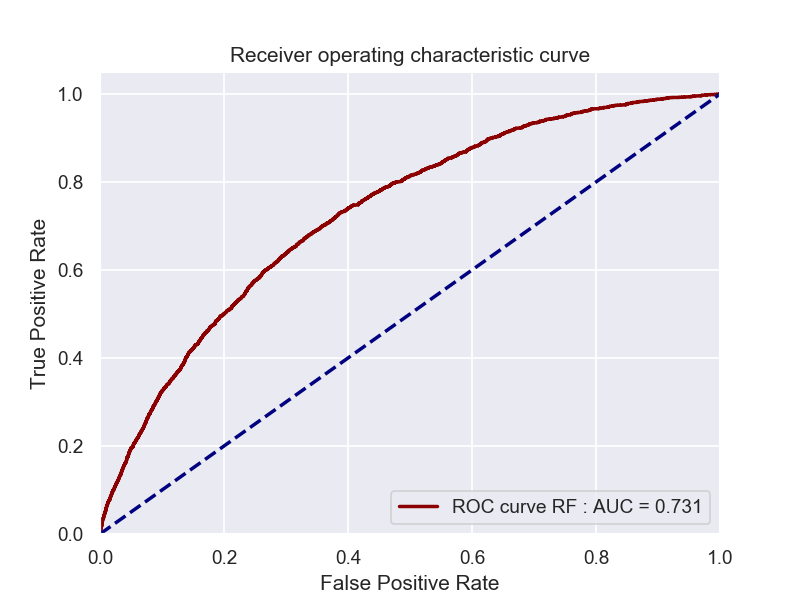

In [11]:
y_pred = m.predict(X_test)
fpr,tpr,_=roc_curve(y_test,y_pred[:,1])
area=auc(fpr,tpr)
fig=plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkred", lw=lw, label="ROC curve RF : AUC = {:.3f}".format(area))
plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")

<IPython.core.display.Javascript object>


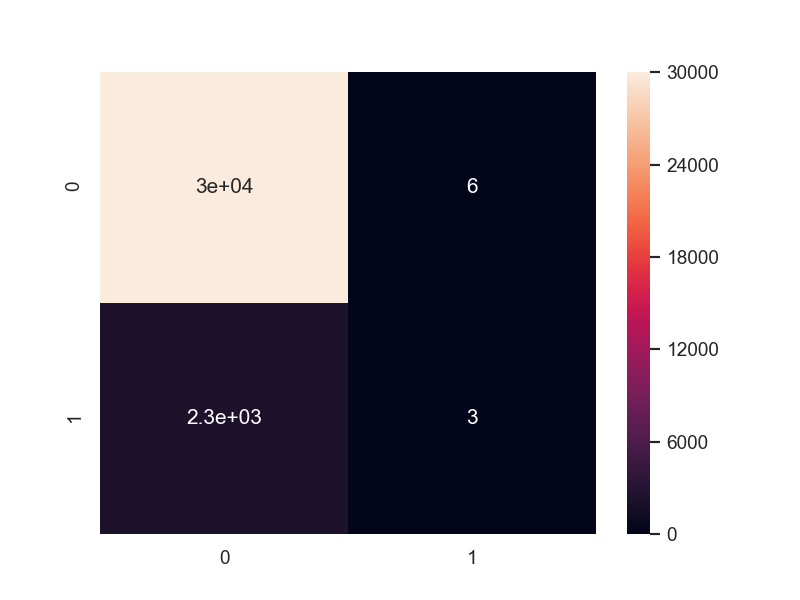

In [12]:
y_pred_binary = np.argmax(m.predict(X_test), axis = 1)
CM=confusion_matrix(y_test, y_pred_binary)
fig=plt.figure()
sns.heatmap(CM, annot=True)

In [14]:


err_train = sum(abs(np.argmax(m.predict(X_train), axis = 1) - np.argmax(y_train, axis = 1) ))/len(y_train)
err_test = sum(abs(y_pred_binary -  y_test))/len(y_test)




recall = CM[1,1]/(CM[1,0]+CM[1,1]) # tp/(tp+fn)
precision = CM[1,1]/(CM[0,1]+CM[1,1]) # # tp/(tp+fp)
tnr = CM[0,0]/(CM[0,1]+CM[0,0]) # tn/(tn+fp) Acc-
tpr = recall # Acc+

f_measure = 2*precision*recall/(precision+recall)
g_mean = (tpr*tnr) ** 0.5
weighted_accuracy = 0.5 * tnr + 0.5 * tpr
    
print('')
print('Metris: ')
print('True Negative Rate (Acc-): {:.2f}%'.format(100*tnr))
print('True Positive Rate (Acc+): {:.2f}%'.format(100*tpr))
print('G-Mean: {:.2f}%'.format(100*g_mean))
print('Weighted Accuracy: {:.2f}%'.format(100*weighted_accuracy))
print('Precision: {:.2f}%'.format(100*precision))
print('Recall: {:.2f}%'.format(100*recall))
print('F-measure: {:.2f}%'.format(100*f_measure))

print('Training error {:.2f}% and the test error is {:.2f}%'.format(err_train*100, 
                                                                             err_test*100))


Metris: 
True Negative Rate (Acc-): 99.98%
True Positive Rate (Acc+): 0.13%
G-Mean: 3.62%
Weighted Accuracy: 50.06%
Precision: 33.33%
Recall: 0.13%
F-measure: 0.26%
Training error 7.05% and the test error is 7.10%
